In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [24]:
df=pd.read_csv("d:/data/ozone/ozone2.csv")
df.head()

,Solar.R,Wind,Temp,Ozone,Result
0,190.000000,7.4,67,41.00000,0
1,118.000000,8.0,72,36.00000,0
2,149.000000,12.6,74,12.00000,0
3,313.000000,11.5,62,18.00000,0
4,185.931507,14.3,56,42.12931,1


In [25]:
print(df.columns)
print()
print(df.shape)
print()
print(df.describe())
print()
print(df.groupby("Result").mean()) # 오존량 분류를 기준으로 한 평균값들

Index(['Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

(153, 5)

          Solar.R        Wind        Temp       Ozone      Result
count  153.000000  153.000000  153.000000  153.000000  153.000000
mean   185.931507    9.957516   77.882353   42.129310    0.529412
std     87.960267    3.523001    9.465270   28.693372    0.500773
min      7.000000    1.700000   56.000000    1.000000    0.000000
25%    120.000000    7.400000   72.000000   21.000000    0.000000
50%    194.000000    9.700000   79.000000   42.129310    1.000000
75%    256.000000   11.500000   85.000000   46.000000    1.000000
max    334.000000   20.700000   97.000000  168.000000    1.000000

           Solar.R       Wind       Temp      Ozone
Result                                             
0       166.302702  11.270833  72.652778  20.902778
1       203.379334   8.790123  82.530864  60.997339


Text(0, 0.5, '빈도')

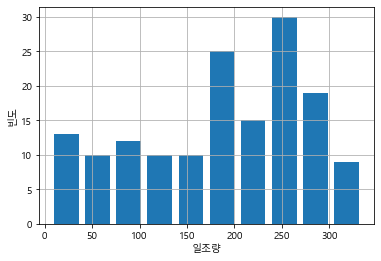

In [26]:
df["Solar.R"].hist(rwidth=0.8)
plt.xlabel('일조량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

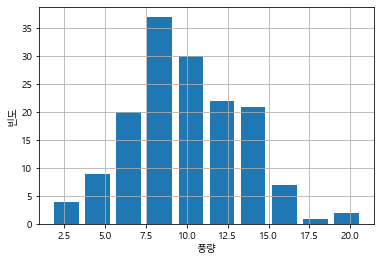

In [27]:
df["Wind"].hist(rwidth=0.8)
plt.xlabel('풍량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

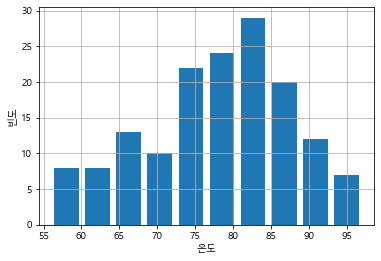

In [28]:
df["Temp"].hist(rwidth=0.8)
plt.xlabel('온도')
plt.ylabel('빈도')

In [29]:
df["Result"].value_counts()

1    81
0    72
Name: Result, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0 : 부족 || 1 : 정상)')

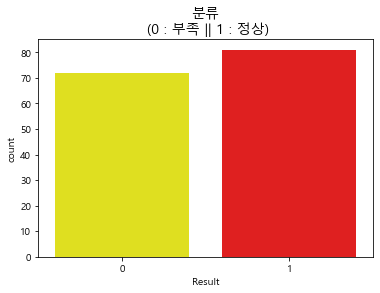

In [30]:
import seaborn as sns

colors=["yellow", "red"]

sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0 : 부족 || 1 : 정상)', fontsize=14)
# 불균형 데이터셋

In [31]:
# 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler

cols=['Solar.R', 'Wind', 'Temp']
X=df[cols]
y=df['Result']

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp=pd.DataFrame(data=X_sample, columns=cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Result'])
df2=pd.concat([X_samp, y_samp], axis=1)

In [32]:
# 오버 샘플링
from imblearn.over_sampling import SMOTE

cols=['Solar.R', 'Wind', 'Temp']
X=df[cols]
y=df['Result']

X_sample, y_sample=SMOTE(random_state=0).fit_resample(X, y)

X_samp=pd.DataFrame(data=X_sample, columns=cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Result'])
df2=pd.concat([X_samp, y_samp], axis=1)

In [33]:
df2["Result"].value_counts()

0    81
1    81
Name: Result, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0 : 부족 || 1 : 정상)')

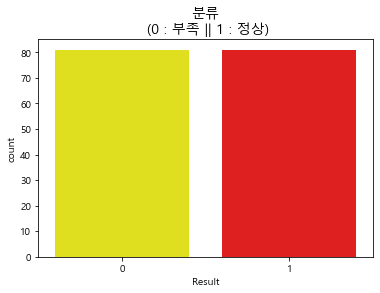

In [34]:
import seaborn as sns

colors=["yellow", "red"]

sns.countplot('Result', data=df2, palette=colors)
plt.title('분류\n (0 : 부족 || 1 : 정상)', fontsize=14)

In [35]:
cols=['Solar.R', 'Wind', 'Temp']
X=X_samp[cols]
y=y_samp['Result']

In [37]:
import statsmodels.api as sm

model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.578389
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.166     
Dependent Variable: Result           AIC:              193.3980  
Date:               2021-12-07 17:46 BIC:              202.6608  
No. Observations:   162              Log-Likelihood:   -93.699   
Df Model:           2                LL-Null:          -112.29   
Df Residuals:       159              LLR p-value:      8.4354e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Solar.R    0.0035     0.0021    1.7215   0.0852   -0.0005    0.0076
Wind      -0.2730     0.0538   -5.0734   0.0000   -0.3785 

In [38]:
# pvalue가 0.05보다 큰 값들을 제거
cols=['Wind', 'Temp']
X=X_samp[cols]
y=y_samp['Result']
df2=pd.concat([X,y], axis=1)

In [39]:
import statsmodels.api as sm

model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.587764
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.152     
Dependent Variable: Result           AIC:              194.4356  
Date:               2021-12-07 17:47 BIC:              200.6108  
No. Observations:   162              Log-Likelihood:   -95.218   
Df Model:           1                LL-Null:          -112.29   
Df Residuals:       160              LLR p-value:      5.1178e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Wind      -0.2610     0.0523   -4.9950   0.0000   -0.3635   -0.1586
Temp       0.0342     0.0069    4.9515   0.0000    0.0206 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
print("학습용 :",model.score(X_train, y_train))
print("검증용 :",model.score(X_test, y_test))

학습용 : 0.8217054263565892
검증용 : 0.5757575757575758


In [42]:
# confusion matrix (혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[ 7,  7],
       [ 7, 12]], dtype=int64)

In [43]:
df_cm=pd.DataFrame(cm, index=[0,1], columns=[0,1])
df_cm

,0,1
0,7,7
1,7,12


<AxesSubplot:title={'center':'Confusion Matrix'}>

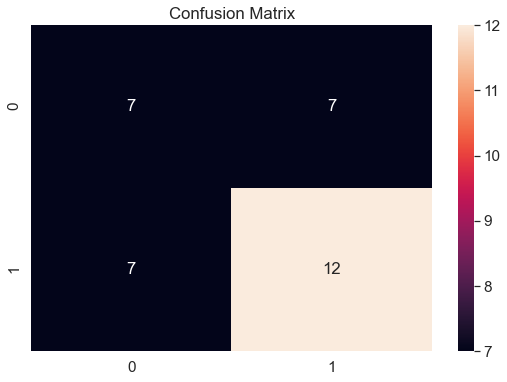

In [45]:
import seaborn as sns
from matplotlib import pyplot as pyplot
%matplotlib inline

sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)

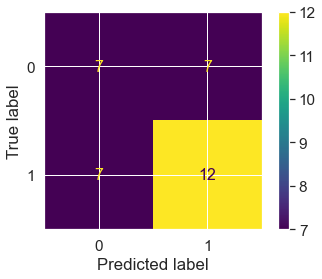

In [46]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size':16})
plot_confusion_matrix(model, X_test, y_test)